- nbody.py : original version
- UG "Unified Gravity" Partanen et al 2025 versions from https://chatgpt.com/c/684bd8c9-8928-800a-968b-fed04ff7e214 
   
- nbod.py ->nbody_AvERA.py
<pre>

I want to have a modified version of the attached python file. The current version uses a fixed explicit solution Friedmann equation to calculate the scale factor (a_explicit) and its derivative in each time step. It assumes that the global density is the same. In the new version I want to swap the averaging and scale factor update in the following way:

- take the density value in each cell of the mesh

- update the Friedmann equation for each cell that gives the new scale factor for that cell ('separate Universes')

- average the scale factor values (a_cellAvg = a_cell.mean()) for all cells and have this as a global scale factor and do the simulation step with that value

- as a reference instead of the explicit solution, also calculate the solution of the Friedmann equation with the fixed general density (-> a_global)

- do this in all time steps and record the values of a_cellAvg(t), a_golbal(t), a_explicit(t) and also the corresponding H values and at the end save them 

Do only minimal necessary changes. If there is suggestion for further optimization, tell it separately.

</pre>

<pre>
I have attached an nbody particle mesh code. It uses a very simple Friedmann solution with fixed Omega_M and also use a() as integration variable. 

I also attached a more sophisticated Friedmann solver, that can calculate the scale factor step by step with RK4 even when the density is not constant.

Please help to combine the advanced solver with the nbody code. 


Please

- keep the nbody code as intact as possible, expect of course the Friedmann integrator

- as a reference keep the original solver (a_original)

- add a solver that calculates the average density and use that as Omega_m and uses your precise integrator (a_avgdens)

- what I really want as a next development is to use the Friedmann solver in each mesh cell separately and follow a() for each cell like they are "separate universes". Calculate also the averages of these a() values (a_cellavg). This is expected to be different from the global scale factor.

- for all the 3 versions  keep track of a_original, a_avgdens and a_cellavg and also the corresponding Hubble parameters. Save and plot these values.
</pre>

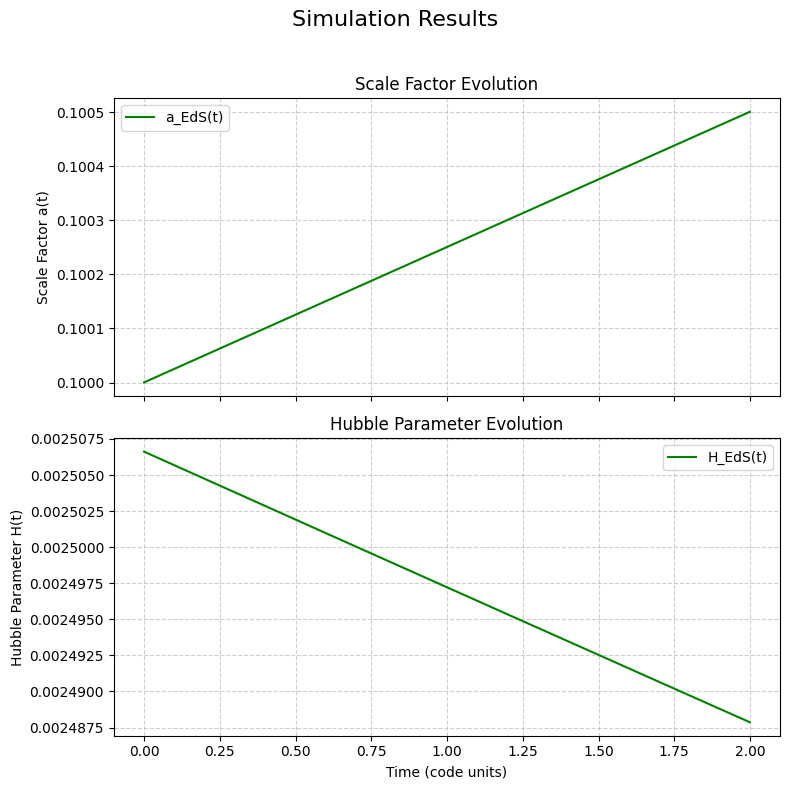

In [13]:
import numpy as np
import matplotlib.pyplot as plt

try:
    # Load the data from the .npz file
    data = np.load('output_data.npz')
    t = data['t']
    a = data['a']
    H = data['H']
    aTRAD = data['aTRAD']
    HTRAD = data['HTRAD']

    # --- Create the plots ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
    fig.suptitle('Simulation Results', fontsize=16)

    # Plot 1: Scale Factor a(t)
    #ax1.plot(t, a, label='a_AvERA(t)', color='blue')
    ax1.plot(t, aTRAD, label='a_EdS(t)', color='green')
    ax1.set_ylabel('Scale Factor a(t)')
    ax1.set_title('Scale Factor Evolution')
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.legend()

    # Plot 2: Hubble Parameter H(t)
    #ax2.plot(t, H, label='H_AvERA(t)', color='blue')
    ax2.plot(t, HTRAD, label='H_EdS(t)', color='green')
    ax2.set_ylabel('Hubble Parameter H(t)')
    ax2.set_xlabel('Time (code units)')
    ax2.set_title('Hubble Parameter Evolution')
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend()

    # Show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

except FileNotFoundError:
    print("Error: 'output_data.npz' not found.")
    print("Please run the simulation script first to generate the data file.")







